In [1]:
import pandas as pd
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Num GPUs Available:  0


In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)


In [3]:
df = pd.read_csv("/kaggle/input/fake-news-detection-78k/fake_real_news_78k.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
#df.describe()

In [6]:
#df.info()

In [7]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
df  = df.fillna('')

In [9]:
#print(df)

In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)

In [12]:
df = df.filter(regex='^(?!Unnamed)', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78469 entries, 0 to 78468
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      78469 non-null  int64 
 1   title   78469 non-null  object
 2   text    78469 non-null  object
 3   label   78469 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [14]:
df.columns

Index(['ID', 'title', 'text', 'label'], dtype='object')

In [15]:
df = df.drop(['ID','title'],axis =1)

In [16]:
print(df)

                                                    text label
0      No comment is expected from Barack Obama Membe...  TRUE
1         Did they post their votes for Hillary already?  TRUE
2       Now, most of the demonstrators gathered last ...  TRUE
3      A dozen politically active pastors came here f...  FAKE
4      The RS-28 Sarmat missile, dubbed Satan 2, will...  TRUE
...                                                  ...   ...
78464  The State Department told the Republican Natio...  TRUE
78465  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE
78466   Anti-Trump Protesters Are Tools of the Oligar...  FAKE
78467  ADDIS ABABA, Ethiopia —President Obama convene...  TRUE
78468  Jeb Bush Is Suddenly Attacking Trump. Here's W...  TRUE

[78469 rows x 2 columns]


In [17]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,TRUE
1,Did they post their votes for Hillary already?,TRUE
2,"Now, most of the demonstrators gathered last ...",TRUE
3,A dozen politically active pastors came here f...,FAKE
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",TRUE


In [18]:
df['label'] = df['label'].replace({'TRUE': 1,})

In [19]:
df['label'] = df['label'].replace({'FAKE': 0})

In [20]:
df.head(10)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,All we can say on this one is it s about time ...,1
6,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,,1
8,"The owner of the Ringling Bar, located south o...",1
9,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [21]:
#df


In [22]:
df = df[df['label'].isin([0, 1])]

In [23]:
df

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
78464,The State Department told the Republican Natio...,1
78465,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
78466,Anti-Trump Protesters Are Tools of the Oligar...,0
78467,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [24]:
from nltk.corpus import stopwords #use to remove stop words

In [25]:
#import nltk
#nltk.download('stopwords')

In [26]:
from nltk.stem.porter import PorterStemmer #used to remove upper case letters to lower case letters

In [27]:
import re #used to enter regular expressions

In [28]:
port_stem =PorterStemmer() #Used to reduce words to it base form e.go running to run

In [29]:
port_stem.stem("Hi thIs is hammad running123 * %@@@")#here it reduce word to lowercase latters

'hi this is hammad running123 * %@@@'

In [30]:
content = ("Hi this is hammad.he is running")
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)#his is a regular expression in Python that is used to remove all characters that are not letters (a-z, A-Z) from a string. The expression will replace all non-letter characters with a space, which can be useful for cleaning up text for further processing.
    con=con.lower()#Convert words into lowercase
    con=con.split()# splits a string into a list of its individual words
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]#This is a list comprehension in Python that is used to stem each word in the string and remove any stopwords. The list comprehension will loop through each word in the string, stem it using the PorterStemmer class, and then check if it is a stopword. If the word is a stopword, it will be excluded from the list.
    con=' '.join(con)
    return con

In [31]:
stemming('Hi this is hammad.he is running123')

'hi hammad run'

In [32]:
#df.head(1000)


In [33]:
#df['text'].head(1000)

In [34]:
# x=df['text'].head(50000).apply(stemming)
# y = df['label'].head(50000)

In [35]:
# a = x
# b = y
# c = a.head(20000)
# d = b.head(20000)

In [36]:

# df['stemmed_text'] = a
# df['label'] = b
# # Save the preprocessed data to a CSV file
# df[['stemmed_text', 'label']].to_csv('preprocessed_data.csv', index=False)


In [37]:
# pip install tensorflow

In [38]:
#import tensorflow as tf


In [39]:
# x=df['text'].apply(stemming)

In [40]:
# y = df['label']

In [41]:
# # Apply stemming to the 'text' column of the DataFrame
# df['stemmed_text'] = df['text'].apply(stemming)
# df['label'] = df['label']
# # Save the preprocessed data to a CSV file
# df[['stemmed_text', 'label']].to_csv('preprocessed_data_file.csv', index=False)


In [42]:
df = pd.read_csv("/kaggle/input/preprocesseddatafile/preprocessed_data_file.csv")

In [43]:
df.columns
df  = df.fillna('')

In [44]:
x = df['stemmed_text'].head(25000)
y = df['label'].head(25000)

In [45]:
c = x
d = y

In [46]:
c.shape

(25000,)

In [47]:
# df.head(1000)
#type(x)

In [48]:
#y.shape()

In [49]:
#x=df['text'].head(50000).apply(stemming)

In [50]:
#y = df['label'].head(50000)

In [51]:
# a = x.head(78330)

In [52]:
# b = y.head(78330)

In [53]:
# c = a.head(50000)

In [54]:
# d = b.head(30000)

In [55]:
c.shape


(25000,)

In [56]:
# y = df['label'].head(20000)

In [57]:
# x = x.head(10000)

In [58]:
# y = y.head(10000)

In [59]:
#y = df['label']

In [60]:
#x.shape

In [61]:
#y.shape

In [62]:
# a = x
# b = y

In [63]:
# c = a.head(50000)
# d = b.head(50000)


In [64]:
# c.shape
# d.shape

In [65]:
#print(y.isnull().any())

In [66]:
#from sklearn.model_selection import train_test_split

In [67]:
#x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20)

In [68]:
#print(x_train.isnull().any())

In [69]:
type(x)

pandas.core.series.Series

In [70]:
#pip install xgboost


In [71]:
# import pandas as pd
# from textblob import TextBlob

# # Assuming you have a DataFrame 'df' with a 'text' column containing the news articles

# # Define a function to extract sentiment features
# def extract_sentiment_features(text):
#     blob = TextBlob(text)
#     sentiment_polarity = blob.sentiment.polarity
#     sentiment_subjectivity = blob.sentiment.subjectivity
#     return sentiment_polarity, sentiment_subjectivity

# # Apply the sentiment analysis function to the 'text' column and create new columns for sentiment features
# df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['text'].apply(extract_sentiment_features))

# # Print the updated DataFrame with sentiment features
# print(df[['text', 'sentiment_polarity', 'sentiment_subjectivity']])


In [72]:
# c=df['stemmed_text'].head(50000).apply(extract_sentiment_features)

In [73]:
# print(c)

In [74]:
#Extra sentiment analysis
# import numpy as np
# from scipy.sparse import hstack
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from textblob import TextBlob

# # Assuming you have a DataFrame 'df' with a 'text' column containing the news articles
# # Define a function to extract sentiment features
# def extract_sentiment_features(text):
#     blob = TextBlob(text)
#     sentiment_polarity = blob.sentiment.polarity
#     sentiment_subjectivity = blob.sentiment.subjectivity
#     return sentiment_polarity, sentiment_subjectivity

# # Apply the sentiment analysis function to the 'text' column and create new columns for sentiment features
# df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['stemmed_text'].apply(extract_sentiment_features))

# # Split the data into training and test sets
# x_train_text, x_test_text, y_train, y_test = train_test_split(df['stemmed_text'], df['label'], test_size=0.2, random_state=42)

# # Initialize the TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(lowercase=True)

# # Fit-transform the text data
# x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_text)
# x_test_tfidf = tfidf_vectorizer.transform(x_test_text)

# # Extract sentiment features for training data
# x_train_sentiment = np.array([extract_sentiment_features(text) for text in x_train_text])

# # Concatenate TF-IDF matrix with sentiment features for training data
# x_train = hstack([x_train_tfidf, x_train_sentiment])

# # Extract sentiment features for test data
# x_test_sentiment = np.array([extract_sentiment_features(text) for text in x_test_text])

# # Concatenate TF-IDF matrix with sentiment features for test data
# x_test = hstack([x_test_tfidf, x_test_sentiment])

# # Initialize the logistic regression model
# logreg = LogisticRegression()

# # Fit the model to the training data
# logreg.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = logreg.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = logreg.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# **Counting the News**

In [75]:
import pandas as pd

# Assuming you have a pandas DataFrame called 'df' with a column named 'label' indicating the news category

# Count the occurrences of each category
news_counts = y.value_counts()

# Access the count of fake news
fake_news_count = news_counts[0]

# Access the count of real news
real_news_count = news_counts[1]

# Print the counts
print("Fake News Count:", fake_news_count)
print("Real News Count:", real_news_count)


Fake News Count: 12003
Real News Count: 12997


# Distribution of Fake and Real News in Dataset

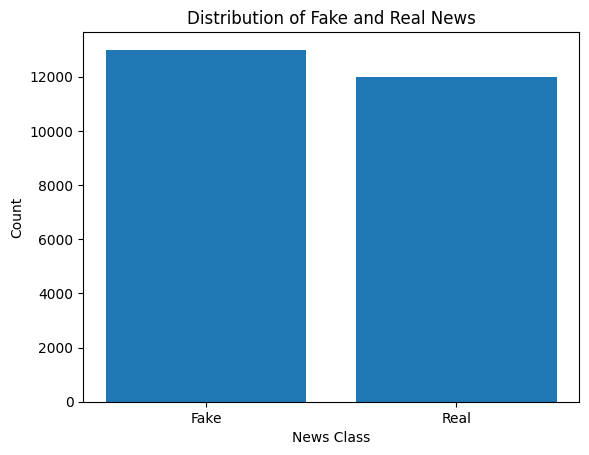

In [76]:
import matplotlib.pyplot as plt

# Count the number of fake and real news articles
fake_count = len(d[d == 1])
real_count = len(d[d == 0])

# Create labels for the x-axis
labels = ['Fake', 'Real']

# Create values for the y-axis
values = [fake_count, real_count]

# Plot the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('News Class')
plt.ylabel('Count')
plt.title('Distribution of Fake and Real News')

# Display the plot
plt.show()


# Distribution of Fake and Real News in Dataset

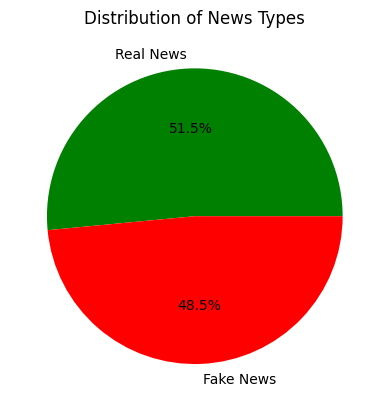

In [77]:
import matplotlib.pyplot as plt

# Assuming you have two variables: fake_news_count and real_news_count
fake_news_count = 24246
real_news_count = 25754

# Calculate the total count of news articles
total_count = fake_news_count + real_news_count

# Calculate the percentage of fake and real news
fake_news_percentage = (fake_news_count / total_count) * 100
real_news_percentage = (real_news_count / total_count) * 100

# Create labels and corresponding percentages for the pie chart
labels = ['Real News', 'Fake News']
percentages = [real_news_percentage, fake_news_percentage]

# Define colors for each category
colors = ['green', 'red']

# Create the pie chart with colors
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of News Types')

# Display the chart
plt.show()


# Distribution of Fake and Real News in Traning Set

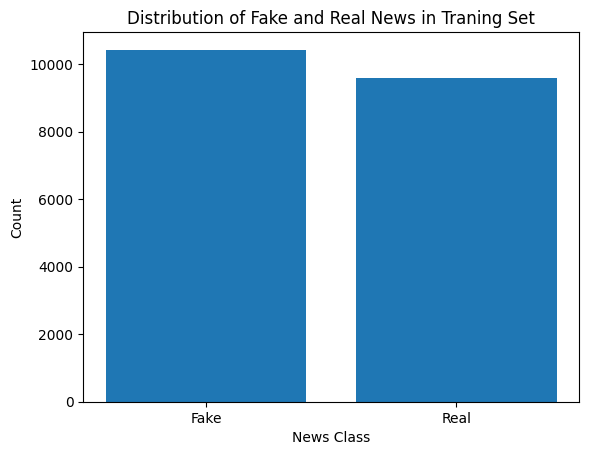

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)
# Count the number of fake and real news articles
fake_count = len(y_train[y_train == 1])
real_count = len(y_train[y_train == 0])

# Create labels for the x-axis
labels = ['Fake', 'Real']

# Create values for the y-axis
values = [fake_count, real_count]

# Plot the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('News Class')
plt.ylabel('Count')
plt.title('Distribution of Fake and Real News in Traning Set')

# Display the plot
plt.show()


# Distribution of Fake and Real News in Test Set

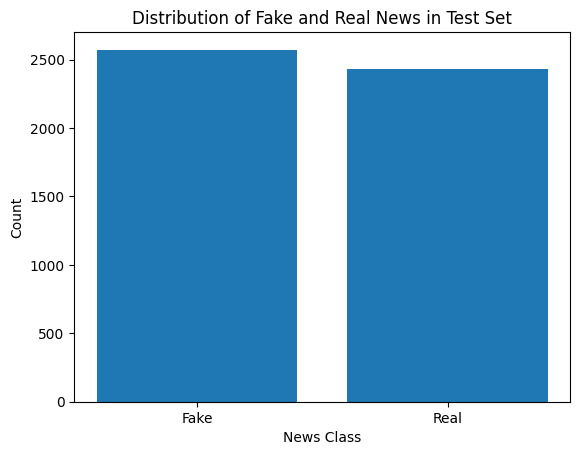

In [79]:
import matplotlib.pyplot as plt

# Count the number of fake and real news articles
fake_count = len(y_test[y_test == 1])
real_count = len(y_test[y_test == 0])

# Create labels for the x-axis
labels = ['Fake', 'Real']

# Create values for the y-axis
values = [fake_count, real_count]

# Plot the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('News Class')
plt.ylabel('Count')
plt.title('Distribution of Fake and Real News in Test Set')

# Display the plot
plt.show()


# Model development

# Hybrid Model Approach using Linear SVM ,Logistic Regression & Gradient Boosting Classifier

In [80]:
# #gbm lsvm lr 95.23
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# # Initialize the individual models
# lsvm = LinearSVC()
# logreg = LogisticRegression()
# gb = GradientBoostingClassifier()

# # Create the ensemble model using hard voting
# estimators = [('lsvm', lsvm), ('logreg', logreg), ('gb', gb)]
# voting = 'hard'
# hybrid_model = VotingClassifier(estimators=estimators, voting=voting)

# # Fit the model to the training data
# hybrid_model.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = hybrid_model.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = hybrid_model.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))


# Model Evaluation Metrices including confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(true_labels, predicted_labels):
    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Calculate the precision score
    precision = precision_score(true_labels, predicted_labels)
    
    # Calculate the recall score
    recall = recall_score(true_labels, predicted_labels)
    
    # Calculate the F1-score
    f1 = f1_score(true_labels, predicted_labels)
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Print the accuracy score
    print("Accuracy:", accuracy)
    
    # Print the precision score
    print("Precision:", precision)
    
    # Print the recall score
    print("Recall:", recall)
    
    # Print the F1-score
    print("F1-score:", f1)


In [82]:
# evaluate_model(y_test ,y_pred)

# Hybrid Model Approach using SVM & Logistic Regression using VotingClassifier (Voting = Hard)

In [83]:
# #Linear SVM & LR
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# # Initialize the logistic regression model
# logreg = LogisticRegression()

# # Initialize the linear SVM model
# lsvm = LinearSVC()

# # Create the VotingClassifier with logistic regression and linear SVM
# hybrid_model = VotingClassifier(
#     estimators=[('logreg', logreg), ('lsvm', lsvm)],
#     voting='hard'
# )

# # Fit the hybrid model to the training data
# hybrid_model.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = hybrid_model.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = hybrid_model.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# Logistic Regression (Single-model approach)

In [84]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train , x_test , y_train , y_test = train_test_split(c,d,test_size=0.20)

# # Initialize the logistic regression model
# logreg = LogisticRegression()
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# vect = TfidfVectorizer(lowercase=True)

# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)
# # Fit the model to the training data
# logreg.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = logreg.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = logreg.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))

# LinearSVC (Single-model approach)

In [85]:
# #Linear svc
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# # Initialize the LSVM model
# lsvm = LinearSVC()

# # Fit the model to the training data
# lsvm.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = lsvm.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = lsvm.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))


In [86]:
x=c.head(15000)
y=d.head(15000)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

import numpy as np

# Assuming you have your data loaded and preprocessed before this point
# Replace 'c' and 'd' with your actual data variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Combine the data into a list
data = list(zip(c, d))

# Convert the list to a NumPy array
data = np.array(data)

# Separate features and labels
x = data[:, 0]
y = data[:, 1].astype(int)

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the LinearSVC model
lsvm = LinearSVC()

# List to store validation accuracies
validation_accuracies = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(x)):
    print(f'Fold {fold + 1}/{num_folds}')

    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x[train_index], x[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Vectorize the text data using TF-IDF
    vect = TfidfVectorizer(lowercase=True)
    x_train_tfidf = vect.fit_transform(x_train_fold)
    x_val_tfidf = vect.transform(x_val_fold)

    # Fit the LinearSVC model to the training data
    lsvm.fit(x_train_tfidf, y_train_fold)

    # Predict the labels for the validation data
    y_val_pred = lsvm.predict(x_val_tfidf)

    # Calculate the accuracy of the model on the validation set
    accuracy = np.mean(y_val_pred == y_val_fold)
    print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

    # Append accuracy to the list
    validation_accuracies.append(accuracy)

# Now, you can evaluate the model on the test set
x_test_tfidf = vect.transform(x_test)
y_test_pred = lsvm.predict(x_test_tfidf)
test_accuracy = np.mean(y_test_pred == y_test)

# Calculate the average validation accuracy
average_accuracy = np.mean(validation_accuracies)
print("\nAverage Validation Accuracy: {:.2f}%".format(average_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


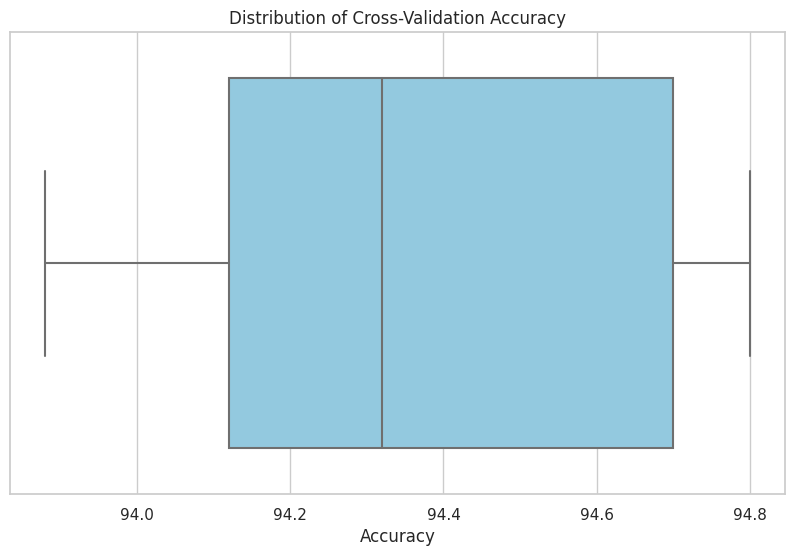

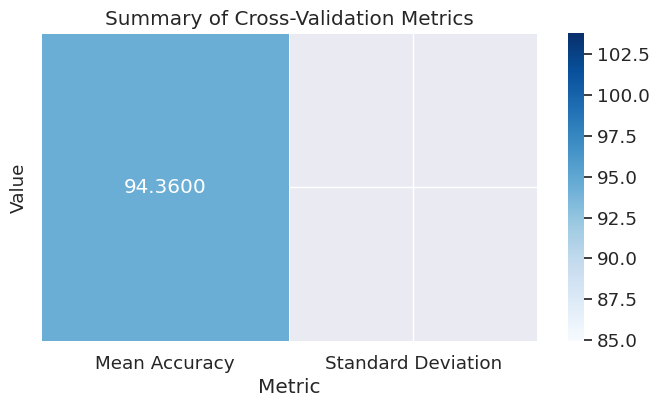

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Provided values
cv_accuracy = [94.80, 94.12, 94.32, 93.88, 94.70]  # Cross-validation accuracy scores
mean_accuracy = 94.36  # Average accuracy
std_accuracy = None  # No standard deviation provided

# Plotting style
sns.set(style="whitegrid")

# Plotting the distribution of accuracy across folds
plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_accuracy, color='skyblue')
plt.title('Distribution of Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.savefig('cross_validation_distribution.png')  # Save the plot as an image
plt.show()

# Creating a table for mean and standard deviation
summary_data = {'Metric': ['Mean Accuracy', 'Standard Deviation'],
                'Value': [mean_accuracy, std_accuracy]}
summary_table = pd.DataFrame(summary_data)

# Plotting the summary table
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(pd.DataFrame(summary_table).set_index('Metric').T, annot=True, cmap='Blues', fmt=".4f", linewidths=.5)
plt.title('Summary of Cross-Validation Metrics')
plt.savefig('cross_validation_summary.png')  # Save the plot as an image
plt.show()


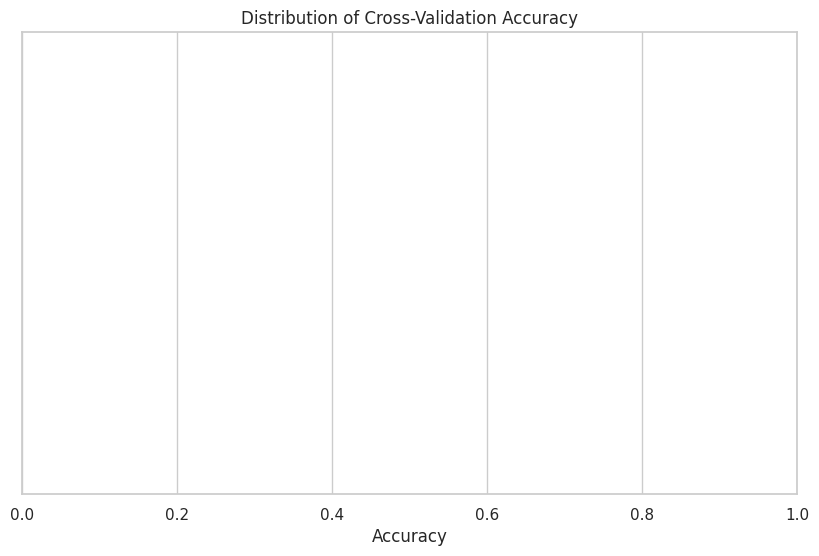

NameError: name 'mean_accuracy' is not defined

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
sns.set(style="whitegrid")

# Plotting the distribution of accuracy across folds
plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_accuracy, color='skyblue')
plt.title('Distribution of Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.show()

# Creating a table for mean and standard deviation
summary_data = {'Metric': ['Mean Accuracy', 'Standard Deviation'],
                'Value': [mean_accuracy, std_accuracy]}
summary_table = pd.DataFrame(summary_data)

# Plotting the summary table
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(pd.DataFrame(summary_table).set_index('Metric').T, annot=True, cmap='Blues', fmt=".4f", linewidths=.5)
plt.title('Summary of Cross-Validation Metrics')
plt.show()


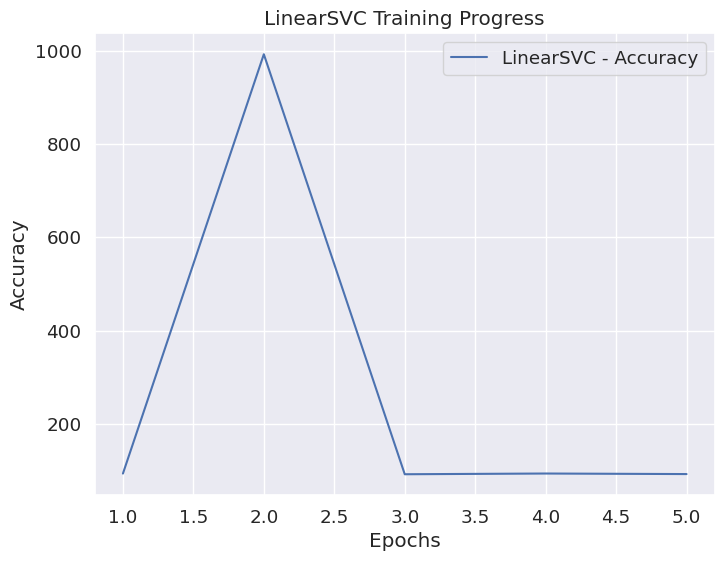

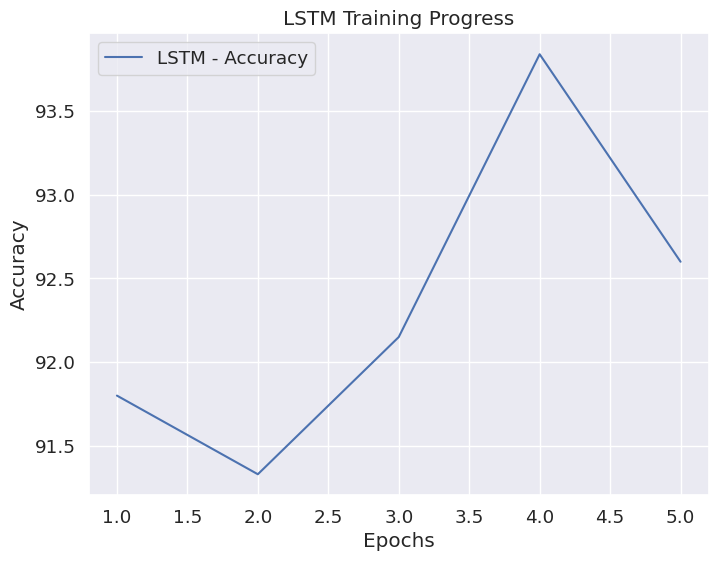

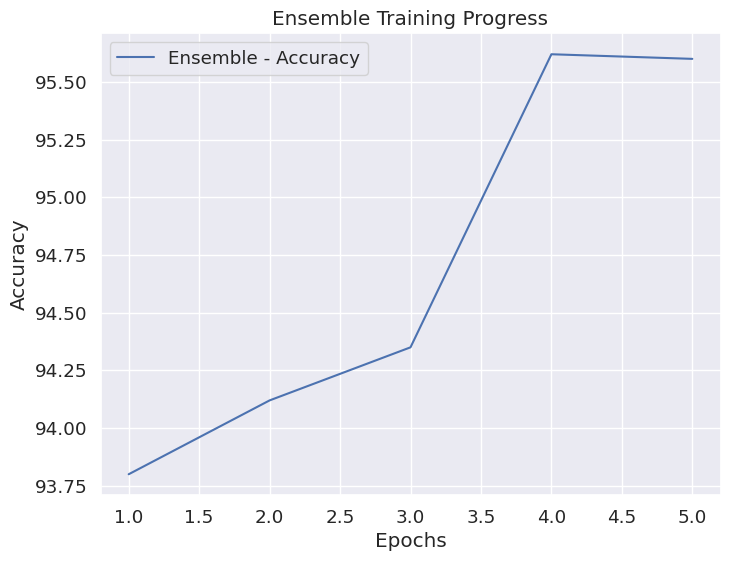

In [97]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
linear_svc_epochs = [1, 2, 3, 4, 5]
linear_svc_accuracy = [93.80, 992.12, 92.32, 93.88, 92.70]

lstm_epochs = [1, 2, 3, 4, 5]
lstm_accuracy = [91.80, 91.33, 92.15, 93.84, 92.60]  # Replace with your LSTM accuracy values

ensemble_epochs = [1, 2, 3, 4, 5]
ensemble_accuracy = [93.80, 94.12 , 94.35,95.62,95.60]  # Replace with your ensemble model accuracy values

def plot_training_graph(epochs, metric_values, metric_name, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, metric_values, label=f'{model_name} - {metric_name}')
    plt.title(f'{model_name} Training Progress')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot LinearSVC Training Graph
plot_training_graph(linear_svc_epochs, linear_svc_accuracy, 'Accuracy', 'LinearSVC')

# Plot LSTM Training Graph
plot_training_graph(lstm_epochs, lstm_accuracy, 'Accuracy', 'LSTM')

# Plot Ensemble Model Training Graph
plot_training_graph(ensemble_epochs, ensemble_accuracy, 'Accuracy', 'Ensemble')


# Naive Bayes -> MultinomialNB (Single Model Approach)

In [119]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# x_train , x_test , y_train , y_test = train_test_split(c,d,test_size=0.20)
# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)
# # Initialize the Multinomial Naive Bayes classifier
# nb = MultinomialNB()

# # Fit the model to the training data
# nb.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = nb.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = nb.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))

# Non-Linear Support vector classifier (Single-model approach)

In [99]:

# from sklearn.svm import SVC
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.20)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)

# # Initialize the SVM model
# svm = SVC()
# y_test = y_test.astype(int)
# y_train = y_train.astype(int)
# # Fit the model to the training data
# svm.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = svm.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = svm.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))

# GradientBoostingClassifier (Ensemble-model approach)

In [89]:
# #GBC
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)
# # Initialize the GBM model
# gbm = GradientBoostingClassifier()

# # Fit the model to the training data
# gbm.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = gbm.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = gbm.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))

In [90]:

# #cnn
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer


# # Load the data
# # data = pd.read_csv('fake_real_news_78k2.csv')

# # # Split the data into features and labels
# # x = data['text']
# # y = data['label']

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# import numpy as np

# x_train_dense = x_train.toarray().astype('float32')
# x_train_reshaped = np.reshape(x_train_dense, (x_train_dense.shape[0], x_train_dense.shape[1], 1))

# x_test_dense = x_test.toarray().astype('float32')
# x_test_reshaped = np.reshape(x_test_dense, (x_test_dense.shape[0], x_test_dense.shape[1], 1))

# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# # Initialize the CNN model
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_dense.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(units=64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units=2, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Reset the model weights
# model.build(x_train_reshaped.shape)

# # Train the model in batches
# batch_size = 64
# for epoch in range(1):
#     for i in range(0, len(x_train_reshaped), batch_size):
#         batch_x = x_train_reshaped[i:i+batch_size]
#         batch_y = y_train[i:i+batch_size]
#         model.train_on_batch(batch_x, batch_y)

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(x_test_reshaped, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))




In [91]:

# #  batch_size=64, epochs=10 86.40
# #10 16 86.24
# #10 32 92..93...
# #LSVM batch size 64 all epochs accuracy 93...94
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=5000, lower=True)
# tokenizer.fit_on_texts(x_train)
# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)

# # Pad the sequences to have the same length
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=maxlen))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))




# Hybrid Model Approach using LinearSVC & LSTM(Deep Learning Approach)

In [92]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


In [93]:

#svs and lstm 93.25 batch 32 epoch 10 93.75
#epochs=7, batch_size=8 94.47%
#epoch 10 93.85 batch size 16

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, concatenate
from sklearn.metrics import accuracy_score
import numpy as np

# Load the data and split it into training and test sets
x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

# Vectorize the text data using TF-IDF
tfidf_vect = TfidfVectorizer(lowercase=True)
x_train_tfidf = tfidf_vect.fit_transform(x_train)
x_test_tfidf = tfidf_vect.transform(x_test)

# Initialize the LinearSVC model and fit it to the training data
lsvc = LinearSVC()
lsvc.fit(x_train_tfidf, y_train)

# Predict the labels for the test data using the LinearSVC model
lsvc_preds = lsvc.predict(x_test_tfidf)

# Tokenize the text data for the LSTM model
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad the sequences to have the same length for the LSTM model
maxlen = 100
x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, padding='post', maxlen=maxlen)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(5000, 128, input_length=maxlen))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(x_train_pad, y_train, epochs=10, batch_size=8, validation_data=(x_test_pad, y_test))

# Predict the labels for the test data using the LSTM model
lstm_probs = lstm_model.predict(x_test_pad)
lstm_preds = np.round(lstm_probs).astype(int)

# Concatenate the predictions of the LinearSVC and LSTM models
hybrid_preds = np.concatenate((lsvc_preds.reshape(-1,1), lstm_preds), axis=1)

# Define the ensemble model
ensemble_model = Sequential()
ensemble_model.add(Dense(16, input_dim=2, activation='relu'))
ensemble_model.add(Dropout(0.2))
ensemble_model.add(Dense(1, activation='sigmoid'))

# Compile the ensemble model
ensemble_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ensemble model
ensemble_model.fit(hybrid_preds, y_test, epochs=10, batch_size=8)

# Predict the labels for the test data using the ensemble model
ensemble_probs = ensemble_model.predict(hybrid_preds)
ensemble_preds = np.round(ensemble_probs).astype(int)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy: {:.2f}%".format(accuracy*100))


Epoch 1/10
2500/2500 [==============================] - 286s 113ms/step - loss: 0.3450 - accuracy: 0.8479 - val_loss: 0.3217 - val_accuracy: 0.8680
Epoch 2/10
2500/2500 [==============================] - 282s 113ms/step - loss: 0.2258 - accuracy: 0.9133 - val_loss: 0.2901 - val_accuracy: 0.8810
Epoch 3/10
2500/2500 [==============================] - 281s 112ms/step - loss: 0.1612 - accuracy: 0.9414 - val_loss: 0.1917 - val_accuracy: 0.9290
Epoch 4/10
2500/2500 [==============================] - 282s 113ms/step - loss: 0.0892 - accuracy: 0.9707 - val_loss: 0.1884 - val_accuracy: 0.9360
Epoch 5/10
2500/2500 [==============================] - 281s 112ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.2770 - val_accuracy: 0.9304
Epoch 7/10
 635/2500 [======>.......................] - ETA: 3:21 - loss: 0.0267 - accuracy: 0.9917

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2500/2500 [==============================] - 282s 113ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.3045 - val_accuracy: 0.9308
Epoch 8/10
2500/2500 [==============================] - 282s 113ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.4052 - val_accuracy: 0.9230
Epoch 9/10
2500/2500 [==============================] - 281s 112ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.3772 - val_accuracy: 0.9316
Epoch 10/10
157/157 [==============================] - 4s 25ms/step
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4962 - accuracy: 0.8010
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3064 - accuracy: 0.9430
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.1948 - accuracy: 0.9416
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.1852 - accuracy: 0.9404
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.1792 - accuracy: 0.9388

In [96]:
ensemble_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                48        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# LinearSVC Metrics
lsvc_accuracy = accuracy_score(y_test, lsvc_preds)
lsvc_precision = precision_score(y_test, lsvc_preds)
lsvc_recall = recall_score(y_test, lsvc_preds)

In [100]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


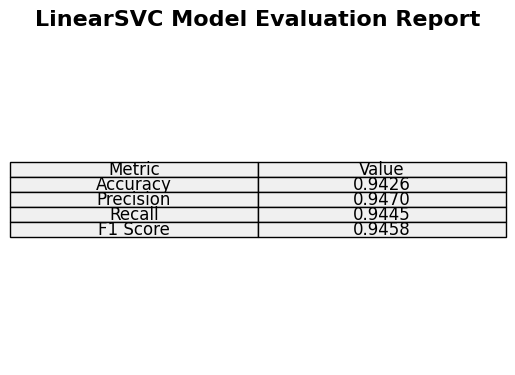

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to create a report image
def create_report_image(metrics_dict, model_name):
    # Output image filename
    output_filename = f"{model_name}_report.png"

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Add a title to the image
    ax.set_title(f"{model_name} Model Evaluation Report", fontweight='bold', fontsize=16)

    # Add a table for metrics
    table_data = [['Metric', 'Value'],
                  ['Accuracy', f"{metrics_dict['accuracy']:.4f}"],
                  ['Precision', f"{metrics_dict['precision']:.4f}"],
                  ['Recall', f"{metrics_dict['recall']:.4f}"],
                  ['F1 Score', f"{metrics_dict['f1_score']:.4f}"]]

    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, cellColours=[['#f0f0f0']*2]*5)
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Hide axes
    ax.axis('off')

    # Adjust layout to bring title closer to the table
    plt.subplots_adjust(top=0.8)

    # Save the figure as an image
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0.1, transparent=True)

# LinearSVC Metrics
lsvc_metrics = {
    'accuracy': accuracy_score(y_test, lsvc_preds),
    'precision': precision_score(y_test, lsvc_preds),
    'recall': recall_score(y_test, lsvc_preds),
    'f1_score': f1_score(y_test, lsvc_preds)
}

# Create a report image for LinearSVC metrics
create_report_image(lsvc_metrics, 'LinearSVC')


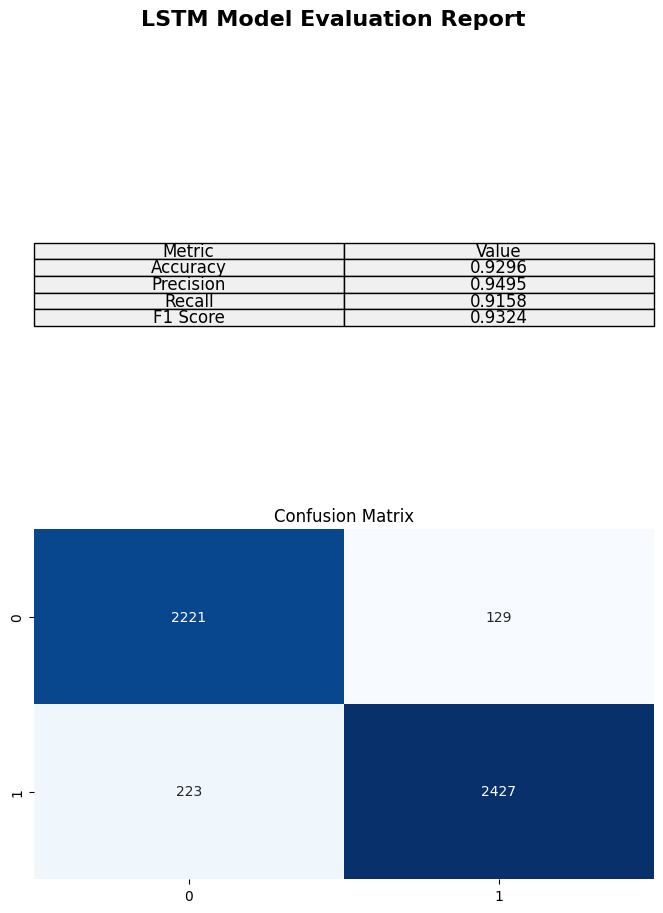

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to create a report image
def create_lstm_report_image(metrics_dict, model_name, confusion_mat):
    # Output image filename
    output_filename = f"{model_name}_report.png"

    # Create a figure and axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Add a title to the image
    fig.suptitle(f"{model_name} Model Evaluation Report", fontweight='bold', fontsize=16)

    # Add a table for metrics
    table_data = [['Metric', 'Value'],
                  ['Accuracy', f"{metrics_dict['accuracy']:.4f}"],
                  ['Precision', f"{metrics_dict['precision']:.4f}"],
                  ['Recall', f"{metrics_dict['recall']:.4f}"],
                  ['F1 Score', f"{metrics_dict['f1_score']:.4f}"]]

    table = ax1.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, cellColours=[['#f0f0f0']*2]*5)
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Hide axes
    ax1.axis('off')

    # Display confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax2)
    ax2.set_title("Confusion Matrix")

    # Save the figure as an image
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0.1, transparent=True)

# LSTM Metrics
lstm_metrics = {
    'accuracy': accuracy_score(y_test, lstm_preds),
    'precision': precision_score(y_test, lstm_preds),
    'recall': recall_score(y_test, lstm_preds),
    'f1_score': f1_score(y_test, lstm_preds)
}

# Confusion Matrix for LSTM
lstm_confusion_mat = confusion_matrix(y_test, lstm_preds)

# Create a report image for LSTM metrics
create_lstm_report_image(lstm_metrics, 'LSTM', lstm_confusion_mat)


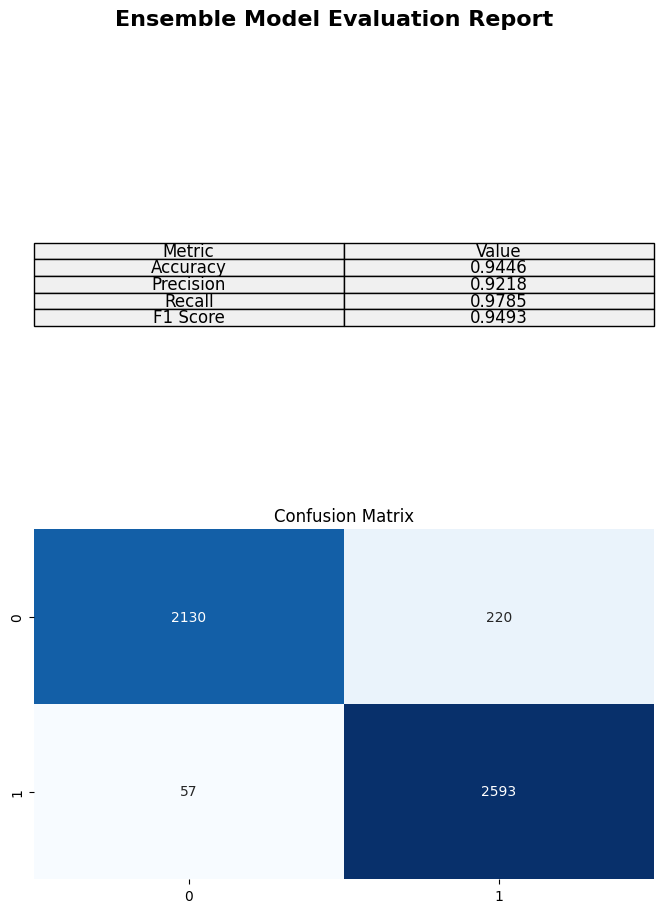

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to create a report image
def create_ensemble_report_image(metrics_dict, model_name, confusion_mat):
    # Output image filename
    output_filename = f"{model_name}_report.png"

    # Create a figure and axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Add a title to the image
    fig.suptitle(f"{model_name} Model Evaluation Report", fontweight='bold', fontsize=16)

    # Add a table for metrics
    table_data = [['Metric', 'Value'],
                  ['Accuracy', f"{metrics_dict['accuracy']:.4f}"],
                  ['Precision', f"{metrics_dict['precision']:.4f}"],
                  ['Recall', f"{metrics_dict['recall']:.4f}"],
                  ['F1 Score', f"{metrics_dict['f1_score']:.4f}"]]

    table = ax1.table(cellText=table_data, loc='center', cellLoc='center', colLabels=None, cellColours=[['#f0f0f0']*2]*5)
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Hide axes
    ax1.axis('off')

    # Display confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax2)
    ax2.set_title("Confusion Matrix")

    # Save the figure as an image
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0.1, transparent=True)

# Ensemble Metrics
ensemble_metrics = {
    'accuracy': accuracy_score(y_test, ensemble_preds),
    'precision': precision_score(y_test, ensemble_preds),
    'recall': recall_score(y_test, ensemble_preds),
    'f1_score': f1_score(y_test, ensemble_preds)
}

# Confusion Matrix for Ensemble
ensemble_confusion_mat = confusion_matrix(y_test, ensemble_preds)

# Create a report image for Ensemble metrics
create_ensemble_report_image(ensemble_metrics, 'Ensemble', ensemble_confusion_mat)


In [108]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Initialize the LinearSVC model
# lsvc_cv = LinearSVC()

# # Number of splits (folds) for cross-validation
# n_splits = 5

# # Initialize StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Lists to store evaluation metrics for each fold
# cv_accuracy = []

# # Perform K-Fold Cross-Validation
# for train_index, test_index in stratkf.split(x_train_tfidf, y_train):
#     x_train_fold, x_val_fold = x_train_tfidf[train_index], x_train_tfidf[test_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

#     # Fit the model on the training fold
#     lsvc_cv.fit(x_train_fold, y_train_fold)

#     # Predict on the validation fold
#     lsvc_cv_preds = lsvc_cv.predict(x_val_fold)

#     # Calculate accuracy for this fold
#     fold_accuracy = accuracy_score(y_val_fold, lsvc_cv_preds)
#     cv_accuracy.append(fold_accuracy)

# # Calculate the mean and standard deviation of accuracy across folds
# mean_accuracy = np.mean(cv_accuracy)
# std_accuracy = np.std(cv_accuracy)

# # Print the results
# print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
# print(f"Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.4f}")


KeyError: '[4, 9, 10, 19, 22, 24, 32, 54, 64, 68, 72, 75, 78, 85, 86, 87, 92, 94, 99, 101, 107, 115, 127, 137, 147, 149, 163, 168, 172, 186, 190, 191, 195, 207, 225, 229, 231, 254, 256, 257, 259, 260, 267, 272, 277, 279, 289, 299, 301, 303, 308, 309, 313, 315, 317, 318, 322, 335, 336, 339, 348, 355, 367, 376, 378, 379, 380, 381, 384, 385, 392, 398, 405, 409, 442, 447, 449, 451, 461, 462, 474, 486, 491, 508, 513, 524, 529, 531, 534, 559, 560, 562, 564, 568, 572, 573, 586, 592, 593, 597, 617, 624, 633, 634, 636, 639, 640, 644, 647, 652, 676, 680, 681, 698, 705, 706, 713, 715, 720, 721, 723, 731, 733, 736, 755, 784, 786, 798, 809, 811, 816, 844, 846, 847, 849, 855, 859, 863, 868, 870, 881, 885, 889, 896, 897, 909, 917, 935, 948, 959, 963, 973, 975, 980, 987, 990, 991, 993, 995, 996, 1001, 1006, 1012, 1017, 1019, 1030, 1034, 1036, 1037, 1043, 1045, 1047, 1049, 1054, 1059, 1061, 1062, 1064, 1069, 1083, 1094, 1095, 1101, 1105, 1133, 1137, 1140, 1148, 1159, 1160, 1174, 1176, 1188, 1193, 1202, 1203, 1206, 1220, 1223, 1225, 1229, 1232, 1235, 1241, 1245, 1249, 1251, 1263, 1264, 1267, 1268, 1283, 1286, 1289, 1294, 1297, 1299, 1301, 1308, 1324, 1326, 1333, 1342, 1347, 1357, 1370, 1371, 1376, 1377, 1379, 1381, 1385, 1386, 1393, 1408, 1410, 1415, 1418, 1422, 1431, 1436, 1444, 1448, 1452, 1456, 1465, 1470, 1477, 1478, 1484, 1503, 1508, 1511, 1521, 1529, 1531, 1538, 1541, 1543, 1554, 1558, 1559, 1564, 1575, 1593, 1595, 1597, 1599, 1607, 1616, 1643, 1645, 1666, 1674, 1677, 1678, 1680, 1687, 1695, 1697, 1699, 1701, 1713, 1721, 1733, 1735, 1741, 1744, 1747, 1762, 1771, 1775, 1781, 1784, 1785, 1793, 1794, 1808, 1814, 1820, 1822, 1827, 1828, 1830, 1834, 1839, 1848, 1849, 1856, 1860, 1862, 1869, 1878, 1888, 1895, 1896, 1897, 1906, 1914, 1922, 1927, 1952, 1955, 1975, 1982, 1986, 1987, 1990, 2004, 2005, 2007, 2008, 2014, 2036, 2058, 2060, 2061, 2064, 2079, 2081, 2093, 2103, 2110, 2114, 2124, 2127, 2161, 2177, 2178, 2183, 2191, 2203, 2212, 2220, 2223, 2241, 2251, 2252, 2263, 2268, 2275, 2281, 2283, 2286, 2293, 2298, 2305, 2316, 2317, 2330, 2332, 2339, 2369, 2373, 2374, 2378, 2380, 2384, 2390, 2393, 2396, 2401, 2402, 2410, 2412, 2417, 2425, 2426, 2438, 2449, 2450, 2458, 2461, 2479, 2500, 2503, 2505, 2507, 2525, 2526, 2527, 2528, 2529, 2534, 2548, 2553, 2559, 2562, 2575, 2576, 2579, 2582, 2588, 2592, 2596, 2605, 2606, 2617, 2620, 2621, 2626, 2630, 2638, 2640, 2644, 2646, 2648, 2665, 2670, 2682, 2687, 2688, 2691, 2694, 2695, 2697, 2702, 2710, 2711, 2716, 2717, 2727, 2733, 2736, 2738, 2740, 2751, 2761, 2762, 2772, 2782, 2786, 2787, 2798, 2802, 2809, 2816, 2831, 2833, 2838, 2851, 2855, 2859, 2880, 2883, 2884, 2893, 2908, 2909, 2914, 2922, 2926, 2930, 2931, 2932, 2934, 2935, 2941, 2942, 2943, 2945, 2947, 2950, 2951, 2957, 2958, 2959, 2962, 2965, 2967, 2979, 2988, 2989, 3003, 3004, 3006, 3011, 3014, 3018, 3026, 3029, 3035, 3040, 3050, 3052, 3057, 3065, 3072, 3095, 3096, 3097, 3101, 3112, 3119, 3126, 3136, 3145, 3154, 3188, 3189, 3192, 3217, 3221, 3229, 3236, 3241, 3248, 3260, 3262, 3263, 3264, 3265, 3270, 3280, 3281, 3291, 3294, 3297, 3299, 3301, 3306, 3311, 3315, 3323, 3327, 3328, 3332, 3344, 3350, 3356, 3367, 3379, 3390, 3394, 3400, 3402, 3410, 3413, 3415, 3416, 3417, 3428, 3431, 3443, 3451, 3455, 3456, 3458, 3459, 3461, 3463, 3467, 3473, 3478, 3493, 3496, 3501, 3507, 3508, 3515, 3516, 3517, 3525, 3526, 3528, 3529, 3541, 3542, 3547, 3548, 3550, 3556, 3558, 3567, 3579, 3581, 3593, 3600, 3605, 3612, 3614, 3620, 3624, 3636, 3655, 3657, 3676, 3680, 3681, 3682, 3688, 3689, 3696, 3722, 3725, 3726, 3743, 3745, 3746, 3749, 3752, 3758, 3770, 3778, 3784, 3788, 3792, 3795, 3799, 3805, 3816, 3838, 3843, 3849, 3850, 3869, 3874, 3887, 3893, 3904, 3907, 3915, 3916, 3920, 3931, 3932, 3934, 3940, 3944, 3946, 3948, 3951, 3959, 3986, 3988, 3989, 3998, 4021, 4033, 4041, 4046, 4051, 4057, 4059, 4065, 4068, 4069, 4073, 4078, 4079, 4081, 4082, 4091, 4093, 4098, 4100, 4106, 4107, 4108, 4111, 4112, 4119, 4125, 4131, 4142, 4144, 4145, 4146, 4160, 4168, 4169, 4175, 4181, 4196, 4198, 4221, 4226, 4231, 4239, 4246, 4247, 4248, 4249, 4251, 4255, 4257, 4259, 4266, 4285, 4296, 4299, 4306, 4313, 4314, 4315, 4326, 4329, 4347, 4349, 4356, 4359, 4385, 4386, 4398, 4402, 4403, 4404, 4410, 4414, 4415, 4419, 4427, 4439, 4441, 4447, 4454, 4474, 4479, 4495, 4499, 4500, 4514, 4516, 4521, 4523, 4524, 4527, 4528, 4533, 4536, 4544, 4547, 4551, 4552, 4556, 4559, 4571, 4572, 4573, 4582, 4586, 4590, 4600, 4614, 4618, 4626, 4628, 4638, 4640, 4657, 4661, 4678, 4680, 4684, 4686, 4692, 4693, 4696, 4706, 4721, 4722, 4734, 4750, 4753, 4754, 4762, 4783, 4784, 4789, 4804, 4805, 4822, 4827, 4837, 4844, 4867, 4878, 4886, 4893, 4894, 4897, 4898, 4920, 4929, 4932, 4934, 4935, 4937, 4940, 4943, 4947, 4948, 4956, 4963, 4972, 5010, 5025, 5028, 5034, 5044, 5051, 5055, 5056, 5059, 5062, 5063, 5068, 5072, 5074, 5082, 5092, 5096, 5097, 5101, 5106, 5116, 5123, 5135, 5141, 5142, 5145, 5149, 5154, 5163, 5165, 5166, 5170, 5172, 5174, 5175, 5182, 5189, 5191, 5199, 5200, 5202, 5208, 5211, 5213, 5214, 5221, 5231, 5233, 5235, 5237, 5249, 5253, 5260, 5267, 5270, 5276, 5279, 5290, 5296, 5301, 5311, 5318, 5336, 5339, 5346, 5359, 5368, 5379, 5383, 5395, 5410, 5419, 5424, 5426, 5428, 5433, 5434, 5438, 5441, 5443, 5451, 5455, 5458, 5462, 5467, 5469, 5475, 5476, 5486, 5493, 5496, 5497, 5506, 5519, 5524, 5525, 5528, 5530, 5537, 5545, 5555, 5560, 5573, 5576, 5577, 5578, 5590, 5594, 5600, 5603, 5614, 5619, 5621, 5622, 5649, 5652, 5653, 5654, 5657, 5662, 5670, 5677, 5681, 5693, 5699, 5702, 5707, 5711, 5718, 5723, 5724, 5726, 5729, 5731, 5732, 5733, 5738, 5745, 5746, 5756, 5757, 5759, 5762, 5773, 5783, 5790, 5811, 5819, 5825, 5834, 5846, 5852, 5861, 5869, 5875, 5880, 5889, 5906, 5916, 5921, 5922, 5927, 5929, 5933, 5950, 5959, 5970, 5976, 5979, 5982, 6020, 6021, 6026, 6027, 6028, 6047, 6053, 6055, 6060, 6075, 6087, 6088, 6089, 6090, 6091, 6092, 6095, 6106, 6113, 6115, 6117, 6120, 6121, 6124, 6129, 6136, 6147, 6168, 6172, 6180, 6190, 6191, 6207, 6212, 6215, 6217, 6221, 6224, 6229, 6248, 6249, 6256, 6261, 6265, 6274, 6275, 6277, 6282, 6300, 6308, 6313, 6315, 6335, 6340, 6345, 6351, 6353, 6362, 6373, 6380, 6389, 6391, 6401, 6407, 6413, 6416, 6417, 6422, 6431, 6439, 6440, 6450, 6455, 6462, 6464, 6477, 6487, 6488, 6493, 6505, 6511, 6513, 6515, 6517, 6523, 6526, 6540, 6541, 6555, 6567, 6568, 6574, 6588, 6596, 6606, 6621, 6623, 6626, 6627, 6633, 6647, 6649, 6664, 6686, 6691, 6698, 6711, 6713, 6715, 6716, 6729, 6738, 6739, 6749, 6758, 6778, 6791, 6796, 6816, 6830, 6833, 6844, 6852, 6853, 6856, 6868, 6869, 6882, 6890, 6901, 6902, 6917, 6922, 6928, 6938, 6943, 6952, 6953, 6955, 6957, 6967, 6970, 6972, 6976, 6980, 6991, 6994, 7001, 7004, 7009, 7017, 7018, 7019, 7030, 7034, 7043, 7046, 7057, 7059, 7075, 7076, 7079, 7084, 7085, 7094, 7095, 7106, 7107, 7108, 7112, 7117, 7120, 7124, 7127, 7128, 7131, 7132, 7133, 7137, 7141, 7150, 7155, 7163, 7164, 7170, 7178, 7181, 7183, 7184, 7196, 7197, 7200, 7202, 7204, 7210, 7214, 7224, 7225, 7226, 7228, 7230, 7239, 7242, 7245, 7246, 7250, 7253, 7257, 7260, 7261, 7265, 7268, 7269, 7276, 7280, 7287, 7289, 7291, 7293, 7295, 7298, 7305, 7307, 7317, 7319, 7327, 7338, 7339, 7341, 7342, 7344, 7347, 7350, 7356, 7366, 7371, 7374, 7382, 7391, 7392, 7398, 7400, 7409, 7418, 7437, 7452, 7454, 7459, 7464, 7478, 7484, 7493, 7514, 7519, 7527, 7536, 7537, 7544, 7547, 7548, 7553, 7554, 7557, 7560, 7575, 7584, 7592, 7599, 7601, 7603, 7616, 7619, 7621, 7622, 7623, 7624, 7632, 7634, 7645, 7649, 7655, 7663, 7664, 7676, 7688, 7691, 7695, 7699, 7702, 7709, 7713, 7715, 7717, 7723, 7730, 7734, 7738, 7739, 7747, 7759, 7763, 7764, 7782, 7790, 7793, 7797, 7810, 7826, 7828, 7868, 7869, 7871, 7876, 7888, 7893, 7897, 7904, 7910, 7916, 7919, 7920, 7932, 7933, 7934, 7936, 7938, 7939, 7942, 7945, 7947, 7979, 7987, 7989, 7990, 7992, 8001, 8006, 8007, 8014, 8018, 8028, 8032, 8033, 8034, 8047, 8059, 8085, 8092, 8104, 8108, 8115, 8121, 8125, 8126, 8149, 8155, 8163, 8164, 8180, 8190, 8191, 8194, 8221, 8222, 8227, 8229, 8243, 8244, 8256, 8263, 8265, 8268, 8272, 8273, 8278, 8289, 8300, 8310, 8318, 8324, 8348, 8349, 8354, 8359, 8362, 8381, 8386, 8391, 8397, 8411, 8421, 8425, 8469, 8475, 8476, 8483, 8493, 8495, 8496, 8497, 8505, 8526, 8528, 8531, 8532, 8533, 8544, 8555, 8557, 8567, 8569, 8574, 8583, 8585, 8587, 8589, 8593, 8602, 8607, 8620, 8631, 8634, 8637, 8646, 8648, 8653, 8662, 8668, 8671, 8675, 8686, 8691, 8697, 8707, 8711, 8714, 8729, 8732, 8736, 8742, 8743, 8748, 8749, 8750, 8774, 8789, 8798, 8801, 8802, 8805, 8809, 8816, 8826, 8831, 8835, 8836, 8848, 8854, 8857, 8869, 8875, 8876, 8878, 8883, 8886, 8901, 8923, 8930, 8934, 8948, 8960, 8962, 8964, 8967, 8985, 8989, 8992, 8993, 8995, 9000, 9005, 9021, 9025, 9031, 9035, 9044, 9045, 9053, 9058, 9071, 9076, 9077, 9082, 9092, 9093, 9098, 9102, 9108, 9110, 9120, 9125, 9127, 9143, 9151, 9156, 9158, 9167, 9170, 9172, 9175, 9181, 9183, 9184, 9200, 9214, 9233, 9234, 9240, 9241, 9248, 9250, 9251, 9253, 9255, 9263, 9272, 9274, 9280, 9293, 9313, 9339, 9352, 9357, 9362, 9363, 9368, 9377, 9394, 9398, 9399, 9407, 9411, 9425, 9428, 9430, 9432, 9460, 9468, 9479, 9487, 9496, 9503, 9508, 9519, 9525, 9527, 9529, 9538, 9555, 9557, 9558, 9565, 9577, 9584, 9585, 9620, 9622, 9629, 9635, 9640, 9642, 9649, 9675, 9681, 9686, 9688, 9695, 9703, 9709, 9725, 9741, 9768, 9769, 9770, 9772, 9774, 9776, 9791, 9800, 9801, 9810, 9816, 9818, 9823, 9834, 9844, 9862, 9867, 9871, 9873, 9874, 9876, 9877, 9880, 9896, 9910, 9927, 9930, 9938, 9944, 9947, 9952, 9958, 9972, 9977, 9978, 9980, 10004, 10010, 10027, 10032, 10039, 10043, 10051, 10060, 10064, 10069, 10072, 10077, 10078, 10080, 10091, 10094, 10101, 10107, 10110, 10121, 10131, 10136, 10143, 10149, 10158, 10171, 10172, 10184, 10188, 10192, 10195, 10196, 10198, 10204, 10205, 10208, 10214, 10221, 10232, 10234, 10235, 10245, 10257, 10266, 10276, 10289, 10290, 10295, 10298, 10299, 10301, 10311, 10312, 10315, 10320, 10321, 10322, 10332, 10333, 10342, 10349, 10351, 10355, 10358, 10367, 10368, 10370, 10375, 10376, 10382, 10385, 10386, 10388, 10389, 10392, 10436, 10449, 10453, 10477, 10484, 10487, 10488, 10494, 10502, 10503, 10506, 10512, 10514, 10526, 10536, 10540, 10541, 10544, 10551, 10554, 10555, 10564, 10565, 10580, 10598, 10599, 10605, 10608, 10611, 10613, 10619, 10625, 10629, 10630, 10634, 10635, 10636, 10647, 10648, 10660, 10665, 10678, 10679, 10681, 10683, 10684, 10689, 10690, 10694, 10696, 10705, 10717, 10718, 10727, 10731, 10733, 10742, 10760, 10763, 10768, 10770, 10774, 10776, 10784, 10785, 10795, 10797, 10803, 10811, 10822, 10823, 10826, 10828, 10831, 10832, 10833, 10849, 10863, 10865, 10874, 10876, 10880, 10886, 10891, 10900, 10902, 10905, 10906, 10911, 10919, 10928, 10930, 10931, 10934, 10945, 10947, 10948, 10953, 10954, 10961, 10968, 10970, 10972, 10974, 10977, 10984, 11004, 11006, 11010, 11019, 11022, 11025, 11026, 11028, 11037, 11047, 11054, 11067, 11070, 11075, 11101, 11110, 11114, 11119, 11131, 11145, 11147, 11159, 11171, 11172, 11174, 11181, 11183, 11184, 11190, 11201, 11228, 11233, 11234, 11235, 11245, 11254, 11255, 11260, 11277, 11281, 11285, 11292, 11297, 11298, 11302, 11306, 11320, 11327, 11343, 11344, 11347, 11360, 11368, 11373, 11375, 11384, 11386, 11388, 11391, 11394, 11396, 11397, 11399, 11402, 11406, 11410, 11428, 11431, 11435, 11440, 11444, 11446, 11454, 11455, 11456, 11461, 11464, 11469, 11472, 11483, 11485, 11489, 11496, 11510, 11512, 11515, 11518, 11521, 11523, 11535, 11538, 11541, 11559, 11563, 11566, 11570, 11574, 11575, 11581, 11592, 11598, 11601, 11612, 11613, 11614, 11622, 11623, 11634, 11639, 11651, 11657, 11699, 11701, 11702, 11704, 11705, 11706, 11711, 11712, 11715, 11716, 11718, 11721, 11730, 11732, 11747, 11750, 11755, 11756, 11757, 11763, 11767, 11769, 11772, 11782, 11785, 11787, 11800, 11810, 11812, 11819, 11827, 11828, 11833, 11836, 11845, 11846, 11864, 11865, 11867, 11880, 11906, 11912, 11915, 11916, 11917, 11921, 11928, 11930, 11936, 11937, 11941, 11948, 11955, 11956, 11966, 11967, 11968, 11972, 11974, 11975, 11978, 11979, 11995, 12003, 12004, 12006, 12015, 12016, 12020, 12021, 12025, 12026, 12028, 12034, 12040, 12041, 12047, 12050, 12051, 12055, 12067, 12068, 12071, 12097, 12107, 12148, 12151, 12153, 12157, 12163, 12171, 12179, 12183, 12194, 12198, 12203, 12205, 12206, 12215, 12227, 12233, 12240, 12249, 12269, 12274, 12282, 12295, 12296, 12297, 12309, 12312, 12339, 12359, 12360, 12361, 12369, 12370, 12372, 12374, 12377, 12394, 12422, 12428, 12429, 12444, 12448, 12468, 12479, 12482, 12501, 12502, 12505, 12517, 12523, 12524, 12527, 12530, 12533, 12534, 12550, 12553, 12559, 12563, 12577, 12589, 12591, 12609, 12620, 12621, 12626, 12632, 12638, 12641, 12647, 12649, 12652, 12653, 12656, 12663, 12666, 12671, 12677, 12679, 12682, 12696, 12701, 12705, 12706, 12709, 12723, 12724, 12727, 12729, 12740, 12748, 12750, 12753, 12756, 12758, 12763, 12768, 12772, 12787, 12790, 12807, 12813, 12816, 12817, 12823, 12831, 12842, 12847, 12856, 12858, 12860, 12862, 12875, 12881, 12886, 12887, 12890, 12894, 12895, 12896, 12905, 12906, 12910, 12924, 12938, 12947, 12958, 12968, 12969, 12972, 12974, 12995, 12997, 13015, 13019, 13029, 13031, 13032, 13037, 13042, 13045, 13059, 13064, 13065, 13067, 13077, 13087, 13105, 13109, 13110, 13121, 13123, 13125, 13127, 13131, 13147, 13150, 13154, 13160, 13181, 13183, 13184, 13186, 13199, 13201, 13204, 13206, 13212, 13218, 13221, 13226, 13236, 13238, 13244, 13262, 13272, 13279, 13284, 13294, 13296, 13300, 13302, 13304, 13319, 13323, 13328, 13334, 13342, 13344, 13354, 13357, 13360, 13367, 13372, 13377, 13380, 13385, 13388, 13398, 13399, 13409, 13413, 13415, 13419, 13420, 13433, 13435, 13442, 13445, 13452, 13460, 13462, 13465, 13467, 13469, 13477, 13485, 13486, 13489, 13491, 13493, 13503, 13510, 13512, 13513, 13514, 13516, 13523, 13525, 13531, 13553, 13565, 13566, 13569, 13576, 13582, 13584, 13593, 13605, 13612, 13614, 13629, 13643, 13644, 13662, 13671, 13675, 13676, 13682, 13684, 13685, 13697, 13701, 13705, 13708, 13718, 13723, 13730, 13733, 13734, 13736, 13762, 13772, 13779, 13798, 13805, 13806, 13817, 13835, 13846, 13850, 13851, 13864, 13867, 13869, 13870, 13911, 13915, 13916, 13917, 13920, 13925, 13929, 13930, 13960, 13964, 13967, 13978, 13987, 13996, 13997, 14004, 14015, 14017, 14036, 14037, 14040, 14041, 14048, 14050, 14057, 14058, 14065, 14076, 14087, 14099, 14101, 14107, 14113, 14126, 14136, 14139, 14140, 14141, 14151, 14155, 14160, 14163, 14164, 14168, 14172, 14177, 14179, 14185, 14188, 14194, 14212, 14215, 14230, 14233, 14237, 14244, 14248, 14251, 14258, 14272, 14276, 14278, 14281, 14284, 14300, 14315, 14330, 14331, 14334, 14343, 14348, 14356, 14367, 14370, 14379, 14381, 14392, 14398, 14404, 14406, 14407, 14411, 14412, 14413, 14419, 14429, 14440, 14465, 14470, 14485, 14488, 14489, 14503, 14504, 14520, 14524, 14541, 14546, 14552, 14557, 14566, 14582, 14588, 14594, 14596, 14604, 14611, 14622, 14624, 14628, 14633, 14641, 14647, 14665, 14675, 14680, 14695, 14698, 14702, 14707, 14708, 14712, 14715, 14717, 14720, 14732, 14736, 14743, 14748, 14756, 14765, 14773, 14778, 14785, 14787, 14791, 14793, 14802, 14803, 14805, 14811, 14827, 14829, 14849, 14857, 14861, 14865, 14868, 14877, 14878, 14885, 14890, 14899, 14919, 14929, 14930, 14936, 14944, 14949, 14951, 14960, 14973, 14981, 14985, 14986, 14988, 15001, 15010, 15013, 15015, 15016, 15021, 15026, 15027, 15029, 15038, 15044, 15046, 15053, 15057, 15058, 15072, 15082, 15086, 15093, 15094, 15125, 15127, 15130, 15135, 15139, 15145, 15152, 15158, 15159, 15164, 15169, 15173, 15177, 15179, 15185, 15215, 15218, 15233, 15246, 15249, 15253, 15254, 15271, 15278, 15292, 15293, 15318, 15324, 15330, 15338, 15340, 15345, 15349, 15357, 15358, 15362, 15365, 15369, 15381, 15386, 15388, 15391, 15417, 15421, 15426, 15428, 15447, 15450, 15451, 15456, 15458, 15461, 15463, 15467, 15471, 15482, 15491, 15507, 15508, 15515, 15517, 15519, 15521, 15526, 15546, 15550, 15555, 15556, 15559, 15560, 15562, 15564, 15582, 15594, 15602, 15603, 15606, 15611, 15618, 15620, 15630, 15632, 15634, 15636, 15649, 15671, 15673, 15676, 15683, 15686, 15698, 15700, 15703, 15705, 15709, 15713, 15716, 15722, 15745, 15748, 15754, 15756, 15760, 15776, 15778, 15780, 15787, 15788, 15794, 15800, 15813, 15820, 15825, 15830, 15833, 15843, 15846, 15848, 15849, 15853, 15856, 15858, 15861, 15872, 15877, 15878, 15889, 15897, 15899, 15905, 15912, 15921, 15929, 15932, 15933, 15941, 15942, 15958, 15964, 15967, 15968, 15973, 15981, 15997, 16005, 16011, 16015, 16018, 16026, 16038, 16054, 16055, 16059, 16064, 16071, 16072, 16102, 16127, 16131, 16133, 16135, 16136, 16140, 16142, 16151, 16171, 16175, 16182, 16183, 16190, 16193, 16201, 16219, 16226, 16230, 16234, 16237, 16246, 16247, 16250, 16251, 16262, 16267, 16271, 16278, 16282, 16285, 16291, 16292, 16294, 16298, 16300, 16312, 16323, 16333, 16344, 16365, 16368, 16369, 16383, 16397, 16400, 16404, 16410, 16424, 16427, 16434, 16436, 16439, 16447, 16460, 16470, 16479, 16482, 16483, 16484, 16485, 16489, 16496, 16514, 16523, 16534, 16537, 16541, 16543, 16547, 16554, 16558, 16560, 16564, 16571, 16584, 16586, 16594, 16596, 16599, 16600, 16603, 16604, 16605, 16606, 16607, 16610, 16614, 16625, 16634, 16646, 16650, 16661, 16666, 16675, 16684, 16685, 16688, 16691, 16692, 16694, 16709, 16711, 16715, 16716, 16726, 16729, 16732, 16735, 16737, 16740, 16747, 16751, 16756, 16782, 16785, 16786, 16787, 16788, 16795, 16798, 16801, 16804, 16810, 16818, 16820, 16823, 16824, 16843, 16844, 16866, 16876, 16879, 16887, 16893, 16894, 16897, 16898, 16899, 16905, 16907, 16911, 16920, 16931, 16942, 16968, 16972, 16993, 17007, 17010, 17013, 17022, 17029, 17032, 17034, 17036, 17040, 17042, 17046, 17048, 17049, 17052, 17053, 17059, 17068, 17082, 17084, 17085, 17091, 17092, 17095, 17110, 17124, 17140, 17141, 17152, 17154, 17159, 17162, 17163, 17164, 17175, 17177, 17178, 17179, 17181, 17185, 17195, 17206, 17220, 17230, 17245, 17246, 17247, 17250, 17259, 17272, 17274, 17275, 17279, 17293, 17295, 17301, 17304, 17307, 17310, 17317, 17319, 17328, 17343, 17345, 17348, 17357, 17377, 17383, 17384, 17387, 17394, 17400, 17404, 17423, 17425, 17426, 17427, 17430, 17433, 17435, 17445, 17447, 17461, 17485, 17491, 17492, 17496, 17498, 17510, 17517, 17521, 17529, 17539, 17547, 17555, 17564, 17569, 17583, 17585, 17594, 17601, 17603, 17605, 17607, 17631, 17633, 17640, 17655, 17661, 17684, 17688, 17699, 17700, 17702, 17707, 17730, 17731, 17739, 17740, 17743, 17744, 17745, 17755, 17756, 17764, 17809, 17814, 17821, 17823, 17827, 17828, 17829, 17831, 17833, 17866, 17875, 17882, 17885, 17886, 17893, 17896, 17910, 17911, 17913, 17920, 17925, 17947, 17949, 17951, 17952, 17964, 17965, 17973, 17981, 17989, 17991, 17994, 17999, 18000, 18001, 18011, 18012, 18016, 18021, 18023, 18044, 18051, 18063, 18067, 18068, 18069, 18073, 18076, 18083, 18086, 18087, 18090, 18093, 18097, 18099, 18102, 18108, 18110, 18113, 18114, 18125, 18139, 18140, 18143, 18147, 18148, 18149, 18157, 18158, 18165, 18171, 18180, 18181, 18182, 18185, 18194, 18195, 18198, 18199, 18203, 18206, 18207, 18217, 18220, 18229, 18244, 18257, 18258, 18260, 18262, 18263, 18266, 18267, 18268, 18286, 18302, 18309, 18322, 18331, 18333, 18346, 18347, 18358, 18359, 18362, 18364, 18373, 18377, 18384, 18386, 18392, 18413, 18417, 18426, 18431, 18434, 18437, 18447, 18453, 18470, 18472, 18473, 18479, 18481, 18484, 18490, 18499, 18500, 18513, 18514, 18519, 18520, 18526, 18534, 18538, 18542, 18543, 18550, 18561, 18578, 18582, 18588, 18591, 18596, 18600, 18601, 18603, 18612, 18621, 18623, 18628, 18630, 18631, 18633, 18642, 18644, 18649, 18650, 18653, 18662, 18677, 18680, 18685, 18701, 18705, 18708, 18715, 18718, 18724, 18728, 18737, 18739, 18740, 18749, 18775, 18777, 18778, 18783, 18793, 18802, 18808, 18813, 18828, 18833, 18847, 18862, 18871, 18879, 18888, 18906, 18909, 18913, 18916, 18925, 18935, 18946, 18947, 18950, 18951, 18956, 18960, 18963, 18968, 18970, 18975, 18986, 18989, 18990, 18991, 18998, 19002, 19006, 19010, 19027, 19031, 19033, 19041, 19052, 19059, 19079, 19084, 19087, 19092, 19101, 19117, 19120, 19121, 19129, 19135, 19137, 19168, 19169, 19177, 19178, 19189, 19190, 19196, 19202, 19214, 19215, 19223, 19226, 19231, 19239, 19247, 19248, 19258, 19260, 19265, 19269, 19283, 19304, 19307, 19327, 19331, 19332, 19333, 19339, 19340, 19344, 19345, 19347, 19350, 19352, 19356, 19358, 19359, 19360, 19376, 19387, 19402, 19410, 19414, 19417, 19419, 19421, 19422, 19430, 19434, 19442, 19443, 19446, 19472, 19488, 19498, 19499, 19500, 19504, 19511, 19515, 19517, 19523, 19535, 19539, 19546, 19553, 19561, 19571, 19572, 19573, 19574, 19576, 19578, 19584, 19586, 19589, 19597, 19599, 19601, 19605, 19606, 19611, 19619, 19625, 19626, 19627, 19628, 19630, 19633, 19641, 19645, 19654, 19658, 19663, 19673, 19709, 19711, 19725, 19730, 19731, 19732, 19734, 19736, 19740, 19742, 19743, 19750, 19757, 19761, 19771, 19776, 19777, 19787, 19790, 19792, 19794, 19798, 19803, 19804, 19806, 19810, 19814, 19818, 19820, 19822, 19825, 19829, 19834, 19838, 19840, 19841, 19844, 19878, 19885, 19888, 19903, 19904, 19910, 19911, 19916, 19918, 19927, 19929, 19930, 19946, 19963, 19967, 19979, 19981, 19988, 19989, 19993] not in index'

In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, Dropout, concatenate
# from sklearn.metrics import accuracy_score

# # Assuming you have your data loaded and preprocessed before this point
# # Replace 'c' and 'd' with your actual data variables

# # Load the data
# # Assuming you have loaded your data into variables c and d

# # Combine the data into a list
# data = list(zip(c, d))

# # Convert the list to a NumPy array
# data = np.array(data)

# # Separate features and labels
# x = data[:, 0]
# y = data[:, 1]

# # Define the number of folds for cross-validation
# num_folds = 2
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Iterate over the folds
# for fold, (train_index, val_index) in enumerate(kf.split(x)):
#     print(f'Fold {fold + 1}/{num_folds}')

#     # Split the data into training and validation sets for this fold
#     x_train_fold, x_val_fold = x[train_index], x[val_index]
#     y_train_fold, y_val_fold = y[train_index], y[val_index]

#     # Vectorize the text data using TF-IDF for SVM
#     tfidf_vect = TfidfVectorizer(lowercase=True)
#     x_train_tfidf = tfidf_vect.fit_transform(x_train_fold)
#     x_val_tfidf = tfidf_vect.transform(x_val_fold)

#     # Initialize the LinearSVC model and fit it to the training data
#     lsvc = LinearSVC()
#     lsvc.fit(x_train_tfidf, y_train_fold)

#     # Predict the labels for the validation data using the LinearSVC model
#     lsvc_preds = lsvc.predict(x_val_tfidf)

#     # Tokenize the text data for the LSTM model
#     tokenizer = Tokenizer(num_words=5000, lower=True)
#     tokenizer.fit_on_texts(x_train_fold)
#     x_train_seq = tokenizer.texts_to_sequences(x_train_fold)
#     x_val_seq = tokenizer.texts_to_sequences(x_val_fold)

#     # Pad the sequences to have the same length for the LSTM model
#     maxlen = 100
#     x_train_pad = pad_sequences(x_train_seq, padding='post', maxlen=maxlen)
#     x_val_pad = pad_sequences(x_val_seq, padding='post', maxlen=maxlen)

#     # Define the LSTM model
#     lstm_model = Sequential()
#     lstm_model.add(Embedding(5000, 128, input_length=maxlen))
#     lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#     lstm_model.add(Dense(1, activation='sigmoid'))

#     # Compile the LSTM model
#     lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#     # Train the LSTM model
#     lstm_model.fit(x_train_pad, y_train_fold, epochs=10, batch_size=8, validation_data=(x_val_pad, y_val_fold))

#     # Predict the labels for the validation data using the LSTM model
#     lstm_probs = lstm_model.predict(x_val_pad)
#     lstm_preds = np.round(lstm_probs).astype(int)

#     # Concatenate the predictions of the LinearSVC and LSTM models
#     hybrid_preds = np.concatenate((lsvc_preds.reshape(-1,1), lstm_preds), axis=1)

#     # Define the ensemble model
#     ensemble_model = Sequential()
#     ensemble_model.add(Dense(16, input_dim=2, activation='relu'))
#     ensemble_model.add(Dropout(0.2))
#     ensemble_model.add(Dense(1, activation='sigmoid'))

#     # Compile the ensemble model
#     ensemble_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#     # Train the ensemble model
#     ensemble_model.fit(hybrid_preds, y_val_fold, epochs=10, batch_size=8)

#     # Predict the labels for the validation data using the ensemble model
#     ensemble_probs = ensemble_model.predict(hybrid_preds)
#     ensemble_preds = np.round(ensemble_probs).astype(int)

#     # Calculate the accuracy of the ensemble model
#     accuracy = accuracy_score(y_val_fold, ensemble_preds)
#     print("Validation Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
# import joblib
# from keras.models import load_model

# # Save TF-IDF Vectorizer
# joblib.dump(tfidf_vect, 'tfidf_vectorizer.pkl')

# # Save LinearSVC model
# joblib.dump(lsvc, 'linear_svc_model.pkl')

# # Save LSTM model
# lstm_model.save('lstm_model.h5')

# # Save Ensemble model
# ensemble_model.save('ensemble_model.h5')

# # Save Tokenizer
# with open('tokenizer.json', 'w', encoding='utf-8') as f:
#     f.write(tokenizer.to_json())

# # Save maxlen to a separate file
# with open('maxlen.txt', 'w') as f:
#     f.write(str(maxlen))


In [ ]:
# import joblib
# from keras.models import load_model
# from keras.preprocessing.text import tokenizer_from_json

# # Load TF-IDF Vectorizer
# tfidf_vect = joblib.load('tfidf_vectorizer.pkl')

# # Load LinearSVC model
# lsvc = joblib.load('linear_svc_model.pkl')

# # Load LSTM model
# lstm_model = load_model('lstm_model.h5')

# # Load Ensemble model
# ensemble_model = load_model('ensemble_model.h5')

# # Load Tokenizer
# with open('tokenizer.json', 'r', encoding='utf-8') as f:
#     tokenizer_config = f.read()
#     tokenizer = tokenizer_from_json(tokenizer_config)

# # Load maxlen from the separate file
# with open('maxlen.txt', 'r') as f:
#     maxlen = int(f.read())


In [ ]:
# import re
# import joblib
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import tokenizer_from_json
# from keras.models import load_model
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# port_stem =PorterStemmer()

# # Function for stemming
# def stemming(content):
#     con = re.sub('[^a-zA-Z]', ' ', content)
#     con = con.lower()
#     con = con.split()
#     con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
#     con = ' '.join(con)
#     return con

# # Load TF-IDF Vectorizer
# tfidf_vect = joblib.load('/kaggle/input/savedfiles/tfidf_vectorizer.pkl')

# # Load LinearSVC model
# lsvc = joblib.load('/kaggle/input/savedfiles/linear_svc_model.pkl')

# # Load LSTM model
# lstm_model = load_model('/kaggle/input/savedfiles/lstm_model.h5')

# # Load Ensemble model
# ensemble_model = load_model('/kaggle/input/savedfiles/ensemble_model.h5')

# # Load Tokenizer
# with open('/kaggle/input/savedfiles/tokenizer.json', 'r', encoding='utf-8') as f:
#     tokenizer_config = f.read()
#     tokenizer = tokenizer_from_json(tokenizer_config)

# # Load maxlen from the separate file
# with open('/kaggle/input/savedfiles/maxlen.txt', 'r') as f:
#     maxlen = int(f.read())

# # Input new text data (replace 'new_text_data' with your actual text)
# new_text_data = "For just a little over four months, Wayne Bradley could be heard spreading the conservative message on Detroit s 910AM Superstation. Then GOP nominee Donald Trump came to town, and things changed drastically.We ve known soft-spoken conservative, Wayne Bradley for several years. He s never been afraid of controversy and has always stood up for his conservative beliefs.On Friday, Bradley told us in an exclusive interview that local media had reached out to him when Trump came due to his position as State Director of African American Engagement for the Republican National Committee. Bradley   who was unpaid during his time at the station   didn t mention his affiliation with 910AM, which, he said, he generally doesn t do when discussing political issues with the media.He also met Trump and posted a photo of him with the candidate. When asked, Bradley said he had nothing to do with Trump s visit and was at at the rally with a pastor.The station, which was well aware of his work with the GOP, informed him by email that he was on  hiatus  that Friday, leading him to believe he would be back on the air shortly. But that wasn t the case.He received clarification on Monday that the show was canceled   for good.It s not clear why station management decided to cancel the show.A station representative told 100 Percent FED UP,  It was a business decision on the back-end. We contacted 910AM and spoke to an administrative assistant who refused to provide her name. According to the person we spoke to, no one at the station was available for comment because they were,  very, very  busy with meetings about Bradley s dismissal.The unnamed assistant told us that a statement would be released, but she was unsure when that might happen.But that s not what station owner Kevin Adell told the Detroit News. According to that report, Bradley was allegedly fired  for violating corporate policy. He violated corporate policy, that s why he got fired. He was let go for insubordination.  But it s not clear what policy Bradley allegedly violated. Bradley suggested it may have been due to the fact he didn t plug the station during interviews with the press.Regardless of the reason, Bradley said he appreciated the opportunity to have a dialogue with the community and was very grateful to have the air time.Moreover, he said that he understands the left-wing political climate in Detroit and respects the owner s decision.While he respects the decision, he told us he was  disappointed  with management for  silencing the dialogue. Others weren t happy with the decision and made their feelings known on the station s Facebook page. 910AM where blacks are kept on the Gov ment PLANTATION and other views of them PROSPERING on their own merits is not allowed,  one person said. Your way or the hiway-not the station I want to listen to-I m out!!!  another person added. I would like to know where Wayne Bradley is at? Why is he not on the air? Shameless,  commented a third critic.Bradley, who has been in radio off and on for about six years, says he s not worried and knows that something better will come along.And, he added, he appreciates the support of the listeners who reached out to the station.Meanwhile, the Oakland County Republican Party has offered their support for Wayne Bradley and asked fellow Republicans to call Superstation 910AM at:Station Phone: (248) 278-0910 Fax: (248) 350-3422 Studio Phone: (313) 209-9000Attention: Kevin Adell, Owner of 910 AM Dody Johnson, Station ManagerIn the meantime, Bradley said he ll continue his daily outreach efforts   something he s been doing since September 2013. It s a different battle in Detroit,  he told us. The key, he added, is to  stay positive. As for the incident with 910AM, Bradley said he views it as a  minor speed bump.  "

# # Preprocess the new text data
# new_text_data = stemming(new_text_data)
# new_text_data_tfidf = tfidf_vect.transform([new_text_data])

# # Predict using LinearSVC
# lsvc_pred = lsvc.predict(new_text_data_tfidf)

# # Tokenize and pad the input data for LSTM model
# new_data_seq = tokenizer.texts_to_sequences([new_text_data])
# new_data_pad = pad_sequences(new_data_seq, padding='post', maxlen=maxlen)

# # Predict using LSTM model
# lstm_pred = lstm_model.predict(new_data_pad)

# # Convert predictions to the correct data type (float32)
# lsvc_pred = lsvc_pred.astype('float32')
# lstm_pred = lstm_pred.astype('float32')

# # Reshape and stack the predictions horizontally
# ensemble_input = np.hstack([lsvc_pred.reshape(-1, 1), lstm_pred.reshape(-1, 1)])

# # Predict using Ensemble model
# ensemble_pred = ensemble_model.predict(ensemble_input)
# print(lsvc_pred)

# print(ensemble_pred)
# # Print the predictions
# if ensemble_pred[0][0] >= 0.5:
#     print("The model predicts this as Class 1")
# else:
#     print("The model predicts this as Class 0")
# print(ensemble_pred[0][0])

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.2)

In [ ]:
# import re
# import joblib
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import tokenizer_from_json
# from keras.models import load_model
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from sklearn.metrics import accuracy_score

# # Function for stemming
# def stemming(content):
#     con = re.sub('[^a-zA-Z]', ' ', content)
#     con = con.lower()
#     con = con.split()
#     con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
#     con = ' '.join(con)
#     return con

# # Load TF-IDF Vectorizer
# tfidf_vect = joblib.load('/kaggle/input/savedfiles/tfidf_vectorizer.pkl')

# # Load LinearSVC model
# lsvc = joblib.load('/kaggle/input/savedfiles/linear_svc_model.pkl')

# # Load LSTM model
# lstm_model = load_model('/kaggle/input/savedfiles/lstm_model.h5')

# # Load Ensemble model
# ensemble_model = load_model('/kaggle/input/savedfiles/ensemble_model.h5')

# # Load Tokenizer
# with open('/kaggle/input/savedfiles/tokenizer.json', 'r', encoding='utf-8') as f:
#     tokenizer_config = f.read()
#     tokenizer = tokenizer_from_json(tokenizer_config)

# # Load maxlen from the separate file
# with open('/kaggle/input/savedfiles/maxlen.txt', 'r') as f:
#     maxlen = int(f.read())

# # Input test data (replace 'test_data' and 'test_labels' with your actual test data)
# test_data = x_test

# test_labels = y_test  # Example labels (1 for positive, 0 for negative)

# # Preprocess the test data
# # test_data = [stemming(text) for text in test_data]
# test_data_tfidf = tfidf_vect.transform(test_data)

# # Predict using LinearSVC
# lsvc_pred = lsvc.predict(test_data_tfidf)

# # Tokenize and pad the input data for LSTM model
# test_data_seq = tokenizer.texts_to_sequences(test_data)
# test_data_pad = pad_sequences(test_data_seq, padding='post', maxlen=maxlen)

# # Predict using LSTM model
# lstm_pred = lstm_model.predict(test_data_pad)

# # Convert predictions to the correct data type (float32)
# lsvc_pred = lsvc_pred.astype('float32')
# lstm_pred = lstm_pred.astype('float32')

# # Reshape and stack the predictions horizontally
# ensemble_input = np.hstack([lsvc_pred.reshape(-1, 1), lstm_pred.reshape(-1, 1)])

# # Predict using Ensemble model
# ensemble_pred = ensemble_model.predict(ensemble_input)

# # Calculate accuracy
# accuracy = accuracy_score(test_labels, (ensemble_pred >= 0.5).astype(int))

# print("Accuracy:", accuracy)


In [ ]:
# # Assuming you have x_test_pad and y_test as your test data
# test_preds = loaded_model.predict(hybrid_preds)
# test_preds = (test_preds >= 0.5).astype(int)  # Apply threshold

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, test_preds)
# precision = precision_score(y_test, test_preds)
# recall = recall_score(y_test, test_preds)
# f1 = f1_score(y_test, test_preds)

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")


# RandomForestClassifier (Ensemble-model approach)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split

# #Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(c, d, test_size=0.20)

# # Vectorize the text data using TF-IDF
# vect = TfidfVectorizer(lowercase=True)
# x_train = vect.fit_transform(x_train)
# x_test = vect.transform(x_test)

# y_test = y_test.astype(int)
# y_train = y_train.astype(int)

# # Initialize the random forest model
# rfc = RandomForestClassifier()

# # Fit the model to the training data
# rfc.fit(x_train, y_train)

# # Predict the labels for the test data
# y_pred = rfc.predict(x_test)

# # Calculate the accuracy of the model
# accuracy = rfc.score(x_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))


In [ ]:
#pip install matplotlib

In [ ]:
# import gc
# gc.collect()

In [ ]:
# import tensorflow.keras.backend as K
# K.clear_session()

In [ ]:
#!conda env list

# #Graphs